# Housing Data Project  

> This project uses a dataset from Kaggle and attemps to predict the price of a house in Kings County USA by creating a regression model. The data has been taken from Kaggle and can be found at https://www.kaggle.com/harlfoxem/housesalesprediction.
The project begins with an analysis of the data as well as provides some graphical interpretation on the relationship between different features from the dataset.
Finally, this project uses linear regression to predict the price of a house based on the data samples and the 19 features provided. 
This project provides a linear regression implementation from first principles as well as Sklearn implementation for verification.

In [1]:
#Imports
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Importing the data
df = pd.read_csv('C:\Users\Botev\Desktop\kc_house_data.csv')

In [9]:
#First five rows of the data 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#General Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


## General Data Computations 

In [8]:
# average price of a house
df['price'].mean()

540088.1417665294

In [11]:
#most expensive house
df['price'].max()

7700000.0

In [12]:
#least expensive house 
df['price'].min()

75000.0

In [10]:
#average condition 
df['condition'].mean()

3.4094295100171195

In [13]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
5        20140512T000000
6        20140627T000000
7        20150115T000000
8        20150415T000000
9        20150312T000000
10       20150403T000000
11       20140527T000000
12       20140528T000000
13       20141007T000000
14       20150312T000000
15       20150124T000000
16       20140731T000000
17       20140529T000000
18       20141205T000000
19       20150424T000000
20       20140514T000000
21       20140826T000000
22       20140703T000000
23       20140516T000000
24       20141120T000000
25       20141103T000000
26       20140626T000000
27       20141201T000000
28       20140624T000000
29       20150302T000000
              ...       
21583    20140610T000000
21584    20141202T000000
21585    20140828T000000
21586    20141015T000000
21587    20150305T000000
21588    20141113T000000
21589    20140910T000000
21590    20140514T000000
21591    20141002T000000


In [21]:
#Number of houses that were sold in year 2014 
sum(df['date'].apply(lambda x: x[:4])=='2014')

14633

In [23]:
#Number of houses were sold in year 2015
sum(df['date'].apply(lambda x: x[:4])=='2015')

6980

In [29]:
df.loc[df['date'].apply(lambda x: x[:4])=='2015']['bedrooms']#number of bedrooms for the houses sold in 2015

2        2
4        3
7        3
8        3
9        3
10       3
14       5
15       4
19       3
29       4
38       4
46       3
48       3
49       3
51       5
53       2
54       5
57       3
59       4
71       3
74       3
77       3
79       4
83       3
91       5
92       3
96       3
105      3
108      4
111      3
        ..
21526    3
21528    3
21530    4
21533    3
21539    3
21540    5
21541    3
21542    4
21544    3
21553    3
21557    3
21561    5
21562    4
21565    4
21566    4
21568    4
21571    4
21576    5
21577    4
21581    3
21587    3
21592    3
21593    5
21597    4
21601    3
21604    3
21606    4
21607    3
21609    4
21611    3
Name: bedrooms, dtype: int64

In [31]:
#Number of bedrooms for the houses sold in 2015
df.loc[df['date'].apply(lambda x: x[:4])=='2015']['bedrooms'].mean()

3.357593123209169

In [33]:
#Number of bedrooms for the houses sold in 2014
df.loc[df['date'].apply(lambda x: x[:4])=='2014']['bedrooms'].mean()

3.377161210961525

> The number of bedrooms is very similar between the two years. 

In [52]:
# Number of houses renovated in 2014
sum(df.loc[df['date'].apply(lambda x: x[:4])=='2014']['yr_renovated']!=0)# a lot have been renovated.

667

In [57]:
# Number of houses renovated in 2015
sum(df.loc[df['date'].apply(lambda x: x[:4])=='2015']['yr_renovated']!=0)

247

# Graphs

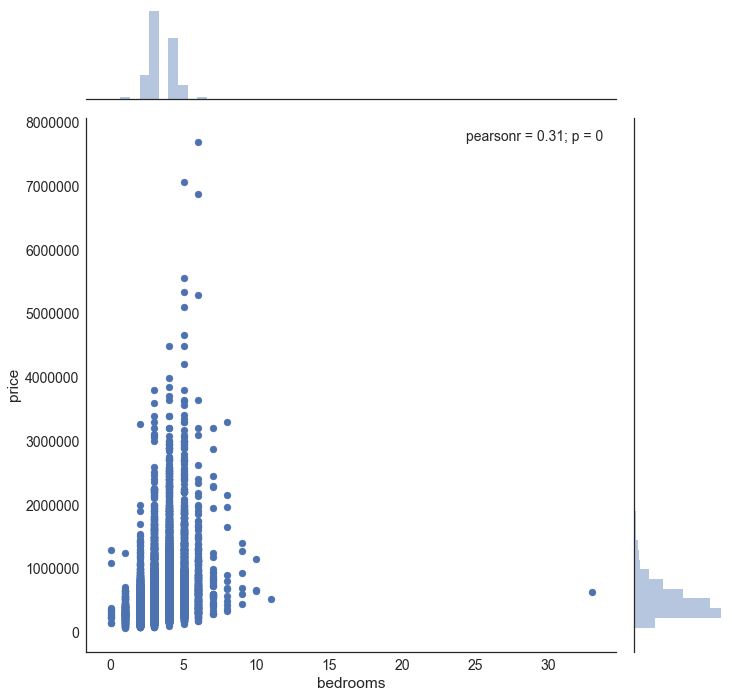

In [15]:
#Number of rooms vs price 
sns.jointplot(x='bedrooms',y ='price',data = df,size = 10)

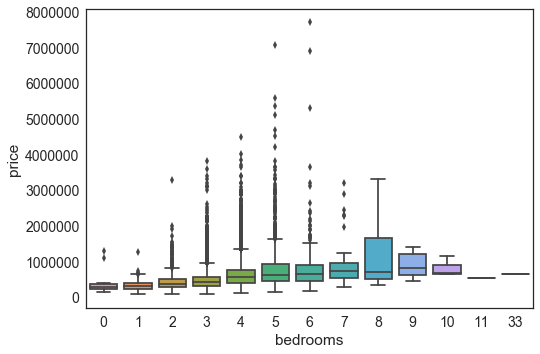

In [14]:
#Number of bedrooms vs price
sns.boxplot(x='bedrooms',y='price',data = df)

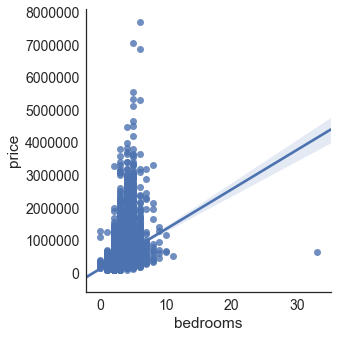

In [13]:
#bedrooms vs price - linear plot
sns.lmplot(x='bedrooms',y='price',data = df)

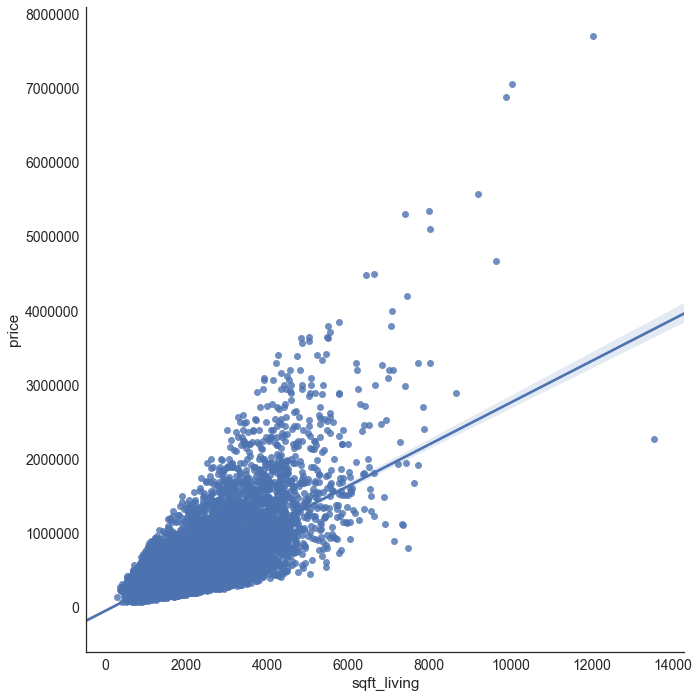

In [12]:
# sqft_living vs price
sns.lmplot(x='sqft_living',y='price',data = df,size=10)

#### Heatmap

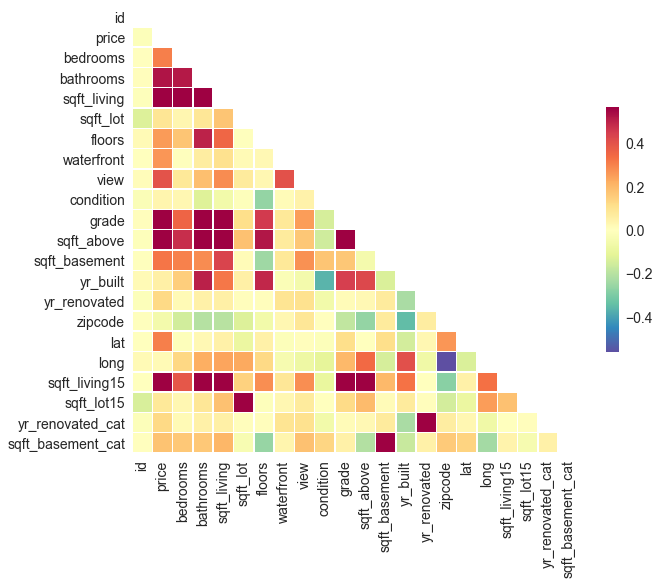

In [43]:
sns.set(style="white",font_scale=1.4)
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
h = sns.heatmap(corr, mask=mask, cmap="Spectral_r", vmax=.3,
            square=True,
            linewidths=.5, 
            cbar_kws={"shrink": .5}, ax=ax);
h.set_yticklabels(h.get_yticklabels(), rotation = 0);

In [47]:
sns.set(style="ticks")

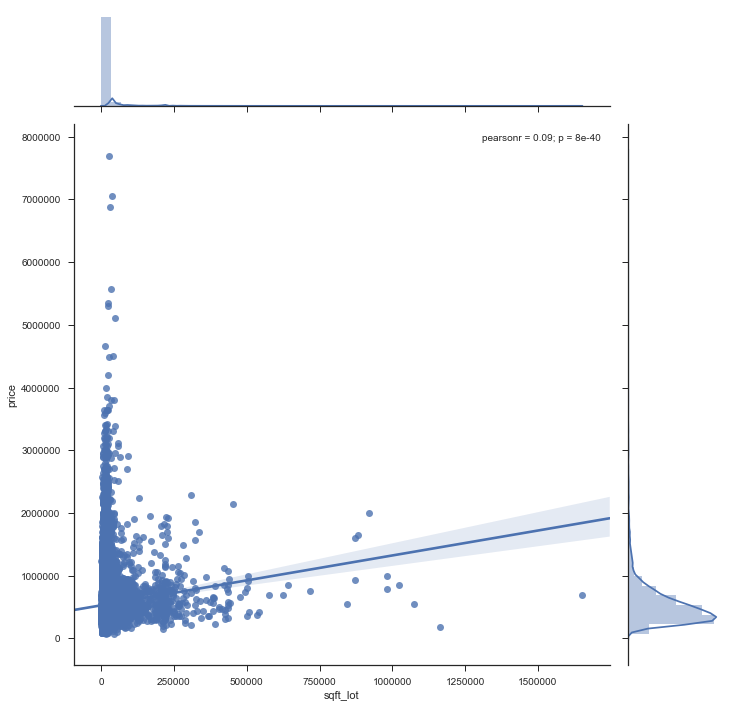

In [48]:
sns.jointplot(x='sqft_lot',y='price',data=df,size = 10,kind = 'reg')

#### Joint Plots

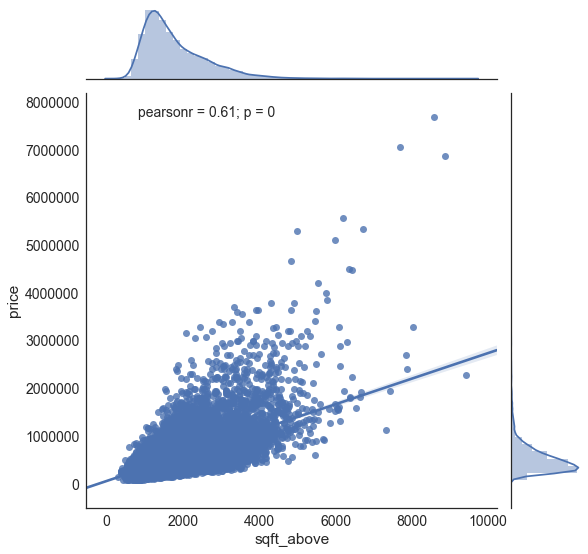

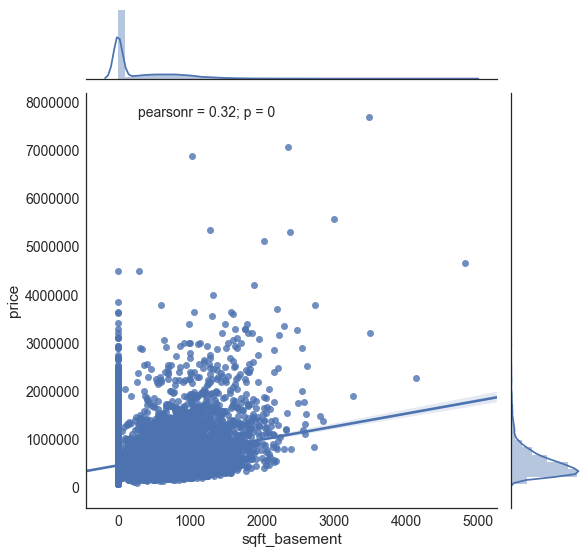

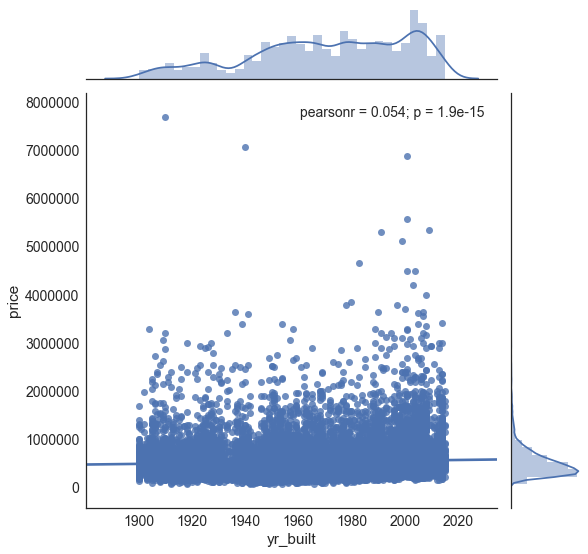

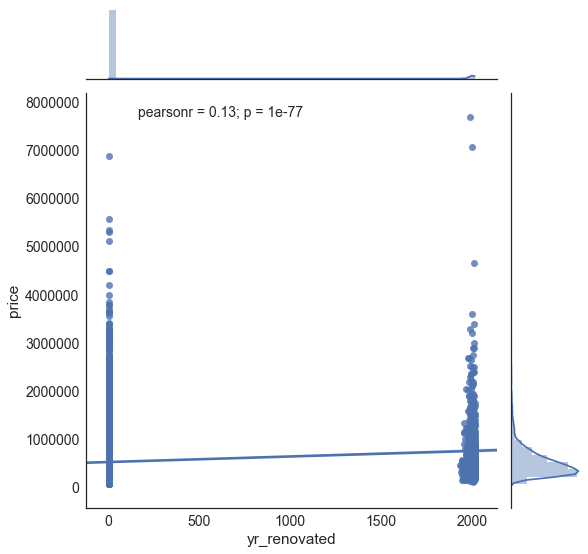

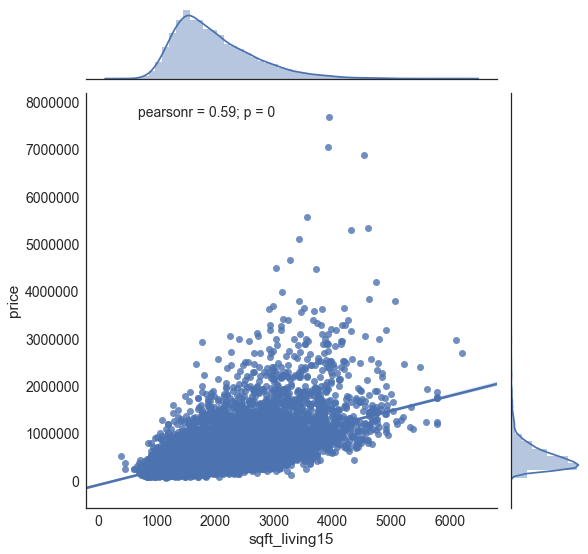

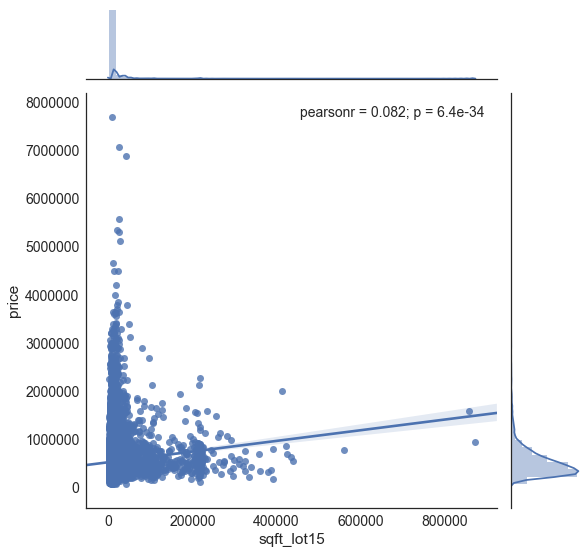

In [38]:
sns.jointplot(x='sqft_above',y='price',data=df,size = 8,kind = 'reg')
sns.jointplot(x='sqft_basement',y='price',data=df,size = 8,kind = 'reg')
sns.jointplot(x='yr_built',y='price',data=df,size = 8,kind = 'reg')
sns.jointplot(x='yr_renovated',y='price',data=df,size = 8,kind = 'reg')
sns.jointplot(x='sqft_living15',y='price',data=df,size = 8,kind = 'reg')
sns.jointplot(x='sqft_lot15',y='price',data=df,size = 8,kind = 'reg')


In [20]:
df['yr_ren'] = df['yr_renovated'].apply(lambda x:'Renovated' if x >0 else 'Not Renovated')

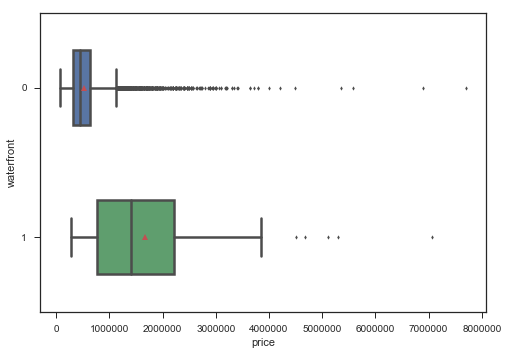

In [49]:
#categorical variables 
sns.boxplot(y='waterfront',x='price',data = df,fliersize = 3,width = 0.5,orient='h',showmeans = True,linewidth=2.5)

In [3]:
#setting the categorical variables 
df['yr_renovated_cat'] = df['yr_renovated'].apply(lambda x:1 if x>0 else 0)
df['sqft_basement_cat'] = df['sqft_basement'].apply(lambda x:1 if x>0 else 0)

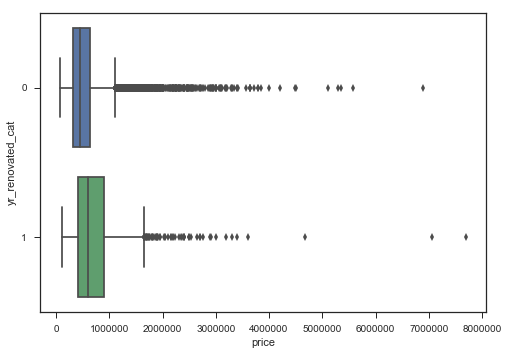

In [50]:
sns.boxplot(x='price',y='yr_renovated_cat',data = df,orient = 'h')

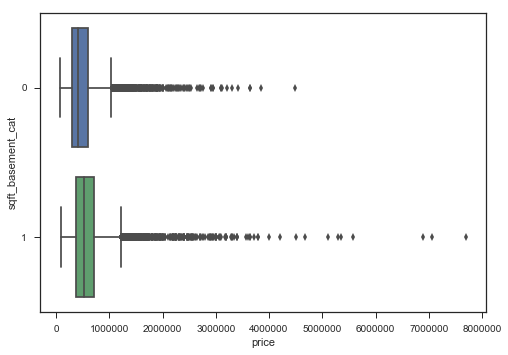

In [51]:
sns.boxplot(x='price',y='sqft_basement_cat',data = df,orient = 'h')

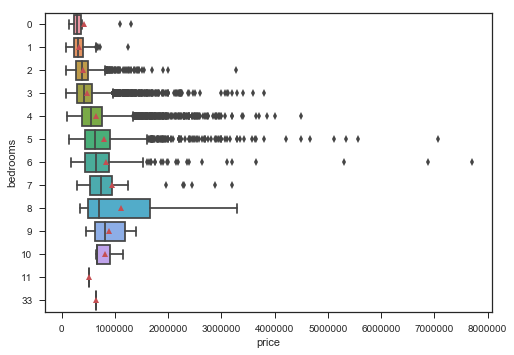

In [52]:
#Relationship between bedrooms and price 
sns.boxplot(y = 'bedrooms', x = 'price', data = df,width = 0.8,orient = 'h',showmeans = True)

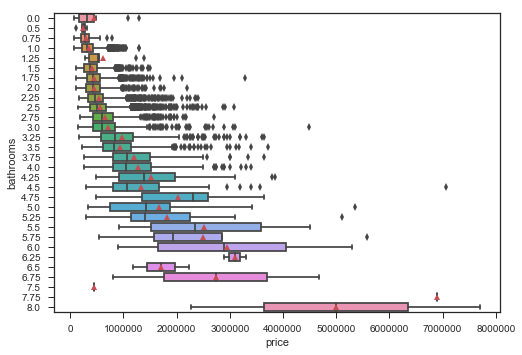

In [53]:
#Definate relationship between bathrooms and price
sns.boxplot(y = 'bathrooms', x = 'price', data = df,width = 0.8,orient = 'h',showmeans = True)

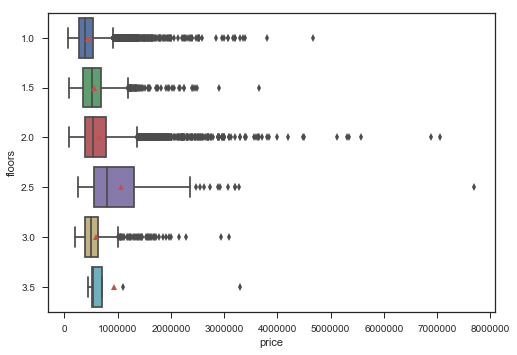

In [54]:
#Floors
sns.boxplot(y = 'floors', x = 'price', data = df,width = 0.8,orient = 'h',showmeans = True)

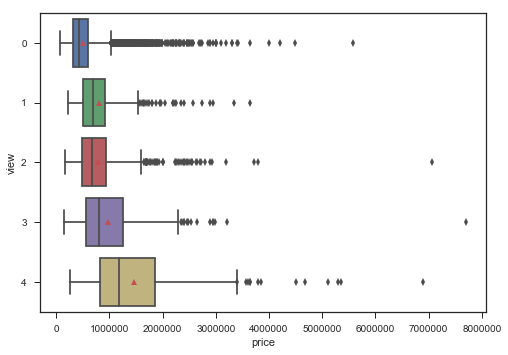

In [55]:
#Definate relationship observed 
sns.boxplot(y = 'view', x = 'price', data = df,width = 0.8,orient = 'h',showmeans = True)

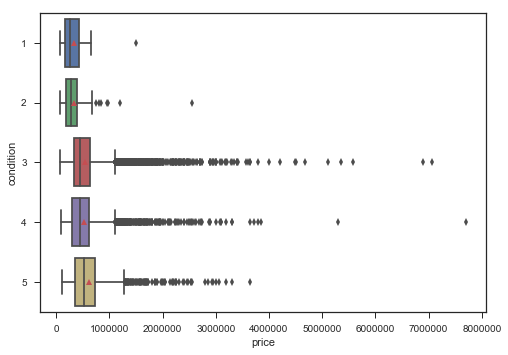

In [56]:
sns.boxplot(y = 'condition', x = 'price', data = df,width = 0.8,orient = 'h',showmeans = True)

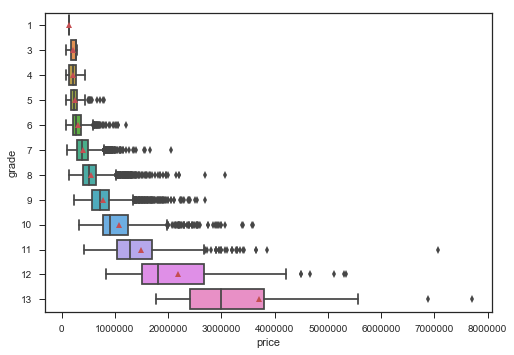

In [57]:
#Definate relationship observed
sns.boxplot(y = 'grade', x = 'price', data = df,width = 0.8,orient = 'h',showmeans = True)

> The following code is used to perform linear regression on the data provided to predict the price of the house. 
There are three versions of linear regression used
- Linear Regression With Sklearn 
- Linear Regression Without Sklearn with L2 Regularisation. The value of the l2 parameter is set to 0.5
- Linear Regression Without Sklearn without L2 Regularisation. The categorical variables are removed in this variation 

## Linear Regression With Sklearn 

In [60]:
X = df[['bedrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement',
        'yr_built','sqft_basement_cat','yr_renovated_cat','sqft_living15','sqft_lot15']]
y = df['price']

In [63]:
#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [64]:
lm = LinearRegression()

In [65]:
fit = lm.fit(X_train,y_train)
fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
print "Accuracy:%d"%(int(fit.score(X_test,y_test)*100))+"%"

Accuracy:65%


#### The total accuracy computed is: 65%

In [67]:
print(lm.intercept_)

5611514.97352


In [68]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients_new'])
coeff_df

,Coefficients_new
bedrooms,-35557.469752
sqft_living,115.106883
sqft_lot,0.037974
floors,39173.752236
waterfront,557532.552977
view,44172.353405
condition,22746.993995
grade,122449.145891
sqft_above,70.074346
sqft_basement,45.032536


## Linear Regression Without Sklearn with L2 Regularisation 

In [4]:
# Adding a comlumn of ones. This is done to handle the bias terms during the matrix multiplication
df['ones'] = 1

In [70]:
X_newidea = df[['bedrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement',
        'yr_built','sqft_basement_cat','yr_renovated_cat','sqft_living15','sqft_lot15','ones']]
y_newidea = df['price']

In [71]:
X_nimatrix = X_newidea.as_matrix()

> In order to implement the Linear Regression, we need to find the values of the weights that minimise the our cost function.
In this case a square error cost function is used. In order to minimise the cost function we need to find its derivative with repsect to the weights and set it to 0. Thus for the weights we obtain the following vectorised equation: X.T.dot(T)/X.T.dot(X) where X represents our input data and T represents the predicted value by the algorithm. We assume that all the errors are Gausian distributed and the overall data trend is linear. 
The linear algebra solver from numpy allows us to perform the entire math in one line in a much more efficient way.

In [111]:
l2 = 0.5
w_map = np.linalg.solve(l2*np.eye(16) + X.T.dot(X), X.T.dot(Y))
Yhat_map = X.dot(w_map)

In [112]:
d1_map = Y - Yhat_map
d2_map = Y - Y.mean()
r2_map = 1 - d1_map.dot(d1_map) / d2_map.dot(d2_map)

In [113]:
r2_map

0.65050949459445451

> Output of the linear regression is the same as the output of linear regression using sklearn 

In [76]:
#Parameters used during the Linear Regression 
w_map

array([ -3.39027324e+04,   1.17395602e+02,   7.59708464e-03,
         3.35608536e+04,   5.75814867e+05,   4.57170443e+04,
         2.81075430e+04,   1.19624686e+05,   6.13215690e+01,
         5.60773224e+01,  -2.80386600e+03,   2.20398215e+04,
         4.88608168e+04,   2.25191405e+01,  -5.94258278e-01,
         4.68554001e+06])

## Linear Regression Without Sklearn and Without L2 Regularisation.

In [7]:
#Categorical Variables have been removed.
X_nocat = df[['bedrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement',
        'yr_built','sqft_living15','sqft_lot15','ones']]
y_nocat = df['price']

In [8]:
X_nocat_mat = X_nocat.as_matrix()

In [9]:
w2 = np.linalg.solve( X_nocat_mat.T.dot(X_nocat_mat), X_nocat_mat.T.dot(y_nocat) )
Yhat2 = X_nocat.dot(w2)


In [10]:
w2.size

14

In [11]:
d1_n = y_nocat - Yhat2
d2_n = y_nocat - y_nocat.mean()
r2_n = 1 - d1_n.dot(d1_n) / d2_n.dot(d2_n)

In [12]:
r2_n# the categorical variables the way they are right now have almost no effect on the r-squared 

0.65067677576004113

## Conclusion 

> Linear regression produces 65% accuracy in all the variation tried. 
Adding L2 regularisation does not improve the result.
The categorical variables do not have any impact on the overall accuracy 